# Shared Pathw phenotypes

###### Latest modif 23/01/2023

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import csv
import seaborn as sns
from datetime import datetime
import os
import glob
#from pySankey.sankey import sankey
import imageio
from pandas.plotting import parallel_coordinates

DATE = datetime.now().strftime("%Y-%m-%d")

In [2]:
p_value_min = 5.8  # -math.log10(0.05/len(x))

directory_path='/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/gwas/2022_11_23_covar_fix/'
save_dir= '/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/figures/'
type_phenots='main' # supplementary, main
if type_phenots=='main':
    ##### MAIN PHENOTYPES
    MAIN_LABELS='mean_angle_taa,mean_angle_tva,tau1_vein,tau1_artery,ratio_AV_DF,eq_CRAE,ratio_CRAE_CRVE,D_A_std,D_V_std,eq_CRVE,ratio_VD,VD_orig_artery,bifurcations,VD_orig_vein,medianDiameter_artery,medianDiameter_vein,ratio_AV_medianDiameter'
    MAIN_NAMES='A temporal angle,V temporal angle,V tortuosity,A tortuosity,ratio tortuosity,A central retinal eq,ratio central retinal eq,A std diameter,V std diameter,V central retinal eq,ratio vascular density,A vascular density,bifurcations,V vascular density,A median diameter,V median diameter,ratio median diameter'
   
    all_files = list(MAIN_LABELS.split(","))
    all_files_new = list(MAIN_NAMES.split(","))
    #df_i=pd.read_csv('/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/figures/intersections_all_main_vZekavat.csv')

elif type_phenots=='supplementary':
    #### SUPPLEMENTARY PHENOTYPES
    SUPPLEMENTARY_LABELS='tau1_all,tau1_artery,tau1_vein,ratio_AV_DF,tau2_all,tau2_artery,tau2_vein,tau4_all,tau4_artery,tau4_vein,D_std,D_A_std,D_V_std,D_CVMe,D_CVMe_A,D_CVMe_V,sd_mean_size,N_median_main_arteries,N_median_main_veins,arcLength_artery,arcLength_vein,bifurcations,VD_orig_all,VD_orig_artery,VD_orig_vein,ratio_VD,FD_all,FD_artery,FD_vein,mean_angle_taa,mean_angle_tva,eq_CRAE,eq_CRVE,median_CRAE,median_CRVE,CRAE,CRVE,ratio_CRAE_CRVE,ratio_median_CRAE_CRVE,ratio_standard_CRE,medianDiameter_all,medianDiameter_artery,medianDiameter_vein,ratio_AV_medianDiameter'
    SUPPLEMENTARY_NAMES='tortuosity,A tortuosity,V tortuosity,ratio tortuosity,tortuosity2,A tortuosity2,V tortuosity2,tortuosity3,A tortuosity3,V tortuosity3,std diameter,A std diameter,V std diameter,CVMe diameter,A CVMe diameter,V CVMe diameter,std norm diameter,A num main,V num main,A arc length,V arc length,bifurcations,vascular density,A vascular density,V vascular density,ratio vascular density,fractal dimension,A fractal dimension,V fractal dimension,A temporal angle,V temporal angle,A central retinal eq,V central retinal eq,A main diameter,V main diameter,A central retinal eq2,V central retinal eq2,ratio central retinal eq,ratio main diameter,ratio central retinal eq2,median diameter,A median diameter,V median diameter,ratio median diameter'
    all_files = list(SUPPLEMENTARY_LABELS.split(","))
    all_files_new = list(SUPPLEMENTARY_NAMES.split(","))
    #df_i=pd.read_csv('/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/figures/intersections_all_suplementary_vZekavat.csv')


In [3]:
mapping_labels = dict(zip(all_files, all_files_new))
mapping_order = dict(zip(all_files_new, list(range(len(all_files_new)))))

In [4]:
l_path_shared_all= []
appended_data = []

    
for file in all_files:
    # Read csvs
    df = pd.read_csv(directory_path+file+'__pathway_scores.txt', delimiter=' ', names =['pathway', 'one', 'second', 'p']) #, index_col=None, header=0)
    df['file_col']=file

    # From p to -log10(p)
    df['-log10(p)'] = -np.log10(df['p'])
    y = df[df['-log10(p)'] >= p_value_min]
    df_significant = y.sort_values('-log10(p)', ascending=False)
    df_significant['pheno']=file
    appended_data.append(df_significant)
    phenotype_path=df_significant['pathway'].to_list()
    print(file, len(phenotype_path), '\n')
    #print(file, len(phenotype_path), phenotype_path, '\n')
    #print(df_significant)
    
appended_data = pd.concat(appended_data)

mean_angle_taa 3 

mean_angle_tva 2 

tau1_vein 11 

tau1_artery 42 

ratio_AV_DF 18 

eq_CRAE 0 

ratio_CRAE_CRVE 1 

D_A_std 3 

D_V_std 7 

eq_CRVE 2 

ratio_VD 4 

VD_orig_artery 1 

bifurcations 2 

VD_orig_vein 6 

medianDiameter_artery 0 

medianDiameter_vein 0 

ratio_AV_medianDiameter 1 



In [5]:
number_of_head = 20
appended_data['pathway'].value_counts().index
list_path=list(appended_data['pathway'].value_counts().head(number_of_head).index)
df_reduc = appended_data[appended_data['pathway'].isin(list_path)]
df_reduc['file_col'] = df_reduc['file_col'].map(mapping_labels)
df_reduc['order']= df_reduc['file_col'].map(mapping_order)
df_reduc.sort_values(by='order', ascending=False, inplace=True)


/tmp/ipykernel_59489/565266596.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduc['file_col'] = df_reduc['file_col'].map(mapping_labels)
/tmp/ipykernel_59489/565266596.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduc['order']= df_reduc['file_col'].map(mapping_order)
/tmp/ipykernel_59489/565266596.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [6]:


l_aux = []

for file in all_files:
    #print('file', file)
    # Read csvs
    df = pd.read_csv(directory_path+file+'__pathway_scores.txt', delimiter=' ', names =['pathway', 'one', 'second', 'p']) #, index_col=None, header=0)

    df['file_col']=file
    l_aux.append(df)

# Concat all the csvs
df_concat = pd.concat(l_aux)

# From p to -log10(p)
df_concat['-log10(p)'] = -np.log10(df_concat['p'])
y = df_concat[df_concat['-log10(p)'] >= p_value_min]
df_significant = y.sort_values('-log10(p)', ascending=False)
#print(df_significant.head(5))
#df_significant.to_csv(save_results + csv_name_all + '.csv')
df_count=df_significant['pathway'].value_counts().to_frame()
df_count['ratio_N_pheno']=df_significant['pathway'].value_counts().to_frame()/len(all_files)
#df_count.to_csv(save_results + csv_name_count + '.csv')

## Save the number of significant genes per phenotype
df_guardar = pd.DataFrame(df_significant.groupby(by=['file_col'])['pathway'].apply(list))
df_guardar2 = pd.DataFrame(df_significant.groupby(by=['file_col'])['pathway'].count())
df_guardar_final=df_guardar.merge(df_guardar2, how='inner', on='file_col')
#df_guardar_final.to_csv(save_results + csv_name_diagonal +'.csv')
df_save_shapes=pd.DataFrame([])
df_save_intersections=pd.DataFrame([])


i=0
for file in all_files:
    i=i+1
    genes=df_significant[df_significant['file_col']==file]['pathway']#.to_list()
    genes=genes.to_list()
    l_aux2 = []
    l_aux3 = []

    for j in range(len(all_files)):#-i):#-file: #Error
        other_file=all_files[j]
        df_intersection=df_significant[(df_significant['file_col']==other_file)&(df_significant['pathway'].isin(genes))]
        # To save the intersection len
        save_shapes=df_intersection.shape[0]
        l_aux3.append(save_shapes)

        # To save the names of the genes in the intersection
        l_aux2.append(df_intersection['pathway'].to_list())# {'index1': value1, 'index2':value2,...}, ignore_index=True)#.to_list())
        #print('antes', df_intersection['gen'].to_list(), 'despues')
        #print(df_intersection['gen'].values())

    # To save the intersection len
    df = pd.DataFrame({file:l_aux3})
    df_save_shapes = pd.concat([df_save_shapes, df], axis=1)

    # To save the names of the genes in the intersection
    df2 = pd.DataFrame({file:l_aux2})
    df_save_intersections = pd.concat([df_save_intersections, df2], axis=1)
    #print(df_save_intersections[1])

# To save the intersection len  
df_save_shapes = df_save_shapes.set_axis(df_save_shapes.columns, axis='index')

#df_save_shapes.to_csv(save_results + csv_name +'.csv')

# To save the names of the genes in the intersection
df_save_intersections = df_save_intersections.set_axis(df_save_intersections.columns, axis='index')
#df_save_intersections.to_csv(save_results + csv_genes_name + '.csv')

df_save_intersections.rename(columns=dict(zip(all_files, all_files_new)), inplace=True)
df_save_intersections.rename(index=dict(zip(all_files, all_files_new)), inplace=True)
df_save_shapes.rename(columns=dict(zip(all_files, all_files_new)), inplace=True)
df_save_shapes.rename(index=dict(zip(all_files, all_files_new)), inplace=True)
#return df_count, df_guardar_final, df_save_shapes, df_save_intersections


In [7]:
np_upper = np.triu(df_save_shapes, k=+1)
#df = df1.fillna(df2)

mask = np.zeros_like(np_upper)
mask[np.triu_indices_from(mask, k=+1)] = True


In [8]:

from matplotlib.colors import LogNorm

sns.set(style="white")
cbar_by_default = False # False different
plt.rcParams['font.size'] = '14'
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 14
size_cbar_label = 12

if cbar_by_default== True:
    size_a=10
    size_b= 8
    fig, ax = plt.subplots(figsize=(size_a,size_b))
    #plt.subplots(figsize=(size_a,size_b))

    sns.heatmap(df_save_shapes, annot=df_save_shapes, fmt='',  cmap="YlGnBu",  norm=LogNorm(),  mask=mask, cbar_kws={'label': 'log(number significant pathways)'}) 
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha='right')
    #plt.savefig(save_results+'/'+str(DATE)+'_half1_ventile'+str(num_ventile)+ '_heatmap_genes_intersection_'+ str(phenotypes_type)+'.pdf', edgecolor='none')
    plt.show()

elif cbar_by_default== 'different':
    size_a=11.5
    size_b= 7
    fig, ax = plt.subplots(figsize=(size_a,size_b))
    sns.heatmap(df_save_shapes, annot=df_save_shapes, fmt='',  cmap="YlGnBu",  norm=LogNorm(), cbar=False, mask=mask) 
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha='right')
    fig.colorbar(ax.collections[0], ax=ax, location="left", use_gridspec=None, pad=0.25).set_label(label='log(number significant pathways)', size=size_cbar_label)
    plt.show()

else:
    print('No gene intersection plot')

No gene intersection plot


In [9]:
Plot_scatter_path= False #True
Plot_traspose = True
if Plot_scatter_path == True:
    plt.rcParams['axes.labelsize'] = 14
    plt.rcParams['axes.titlesize'] = 14
    plt.rcParams['font.size'] = '14'
    if Plot_traspose==False:
        plt.figure(figsize=(13, 4))
        name_save='main_pathway_phenotypes_scatterplots_25_11_2022.png'
    else:
        plt.figure(figsize=(4, 10))

   # elif type_phenots=='supplementary':
        #plt.figure(figsize=(15, 12))
        #name_save='sup_pathway_phenotypes_scatterplots_25_11_2022.png'
    #plt.xlabel('Genes') 
    #plt.ylabel('Phenotypes')

    if Plot_traspose == False:
        #plt.scatter(df_reduc['pathway'], df_reduc['file_col'], cmap='turbo', c=df_reduc['-log10(p)'], s=1.5*df_reduc['-log10(p)'])
        plt.scatter(df_reduc['pathway'], df_reduc['file_col'], s=1.25*df_reduc['-log10(p)'])
        #cbar= plt.colorbar(fraction=0.1)
        #cbar.set_label('-log(p)')
        plt.grid(color='gray', linestyle='-', linewidth=0.1)
        #plt.stem(df_reduc['pathway'], df_reduc['file_col'],  basefmt = " ") #markerfmt='.',
        plt.xticks(df_reduc['pathway'], rotation=45, ha='right')
    else:
        plt.scatter(df_reduc['file_col'], df_reduc['pathway'], s=1.25*df_reduc['-log10(p)'])
        plt.grid(color='gray', linestyle='-', linewidth=0.1)
        plt.xticks(df_reduc['file_col'], rotation=45, ha='right')
else:
    print('no plot scatter')

no plot scatter


In [10]:
list_raw_pathways =  list(set(df_reduc['pathway']))

dic_rename_pathways = {'FAN_EMBRYONIC_CTX_BIG_GROUPS_BRAIN_ENDOTHELIAL': 'Embryonic ctx big groups brain endothelial', 
'AIZARANI_LIVER_C33_STELLATE_CELLS_2': 'Aizarani liver c33 stellate cells 2', 
'AIZARANI_LIVER_C10_MVECS_1': 'Aizarani liver c10 mvecs 1',  
'HP_ABNORMAL_RETINAL_MORPHOLOGY': 'Abnormal retinal morphology', 
'FAN_EMBRYONIC_CTX_BRAIN_ENDOTHELIAL_1': 'Embryonic ctx brain endothelial 1', 
'MANNO_MIDBRAIN_NEUROTYPES_HENDO': 'Manno midbrain neurotypes hendo', 
'chr8p23': 'chr8p23', 
'LAKE_ADULT_KIDNEY_C26_MESANGIAL_CELLS': 'Lake adult kidney c26 mesangial cells', 
'MURARO_PANCREAS_ENDOTHELIAL_CELL': 'Muraro pancreas endothelial cell', 
'KRIEG_HYPOXIA_NOT_VIA_KDM3A': 'Krieg hypoxia not via kdm3a', 
'GO_ACTOMYOSIN': 'Actomyosin', 
'GO_ANCHORING_JUNCTION': 'Anchoring junction', 
'HU_FETAL_RETINA_FIBROBLAST': 'Fetal retina fibroblast',
'HP_ABNORMAL_ANTERIOR_EYE_SEGMENT_MORPHOLOGY': 'Abnormal anterior eye segment morphology', 
'LAKE_ADULT_KIDNEY_C27_VASCULAR_SMOOTH_MUSCLE_CELLS_AND_PERICYTES': 'Lake adult kidney c27 vascular smooth muscle *', 
'FAN_EMBRYONIC_CTX_BRAIN_ENDOTHELIAL_2': 'Embryonic ctx brain endothelial 2', 
'GO_RESPONSE_TO_GROWTH_FACTOR': 'Response to growth factor', 
'GAO_LARGE_INTESTINE_ADULT_CJ_IMMUNE_CELLS': 'Large intestine adult cj immune cells',
'MANNO_MIDBRAIN_NEUROTYPES_HPERIC': 'Manno midbrain neurotypes hperic', 
'AIZARANI_LIVER_C9_LSECS_1': 'Aizarani liver c9 lsecs 1'}

/tmp/ipykernel_59489/1681006283.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduc['pathway'].replace(list(dic_rename_pathways.keys()), list(dic_rename_pathways.values()), inplace=True)


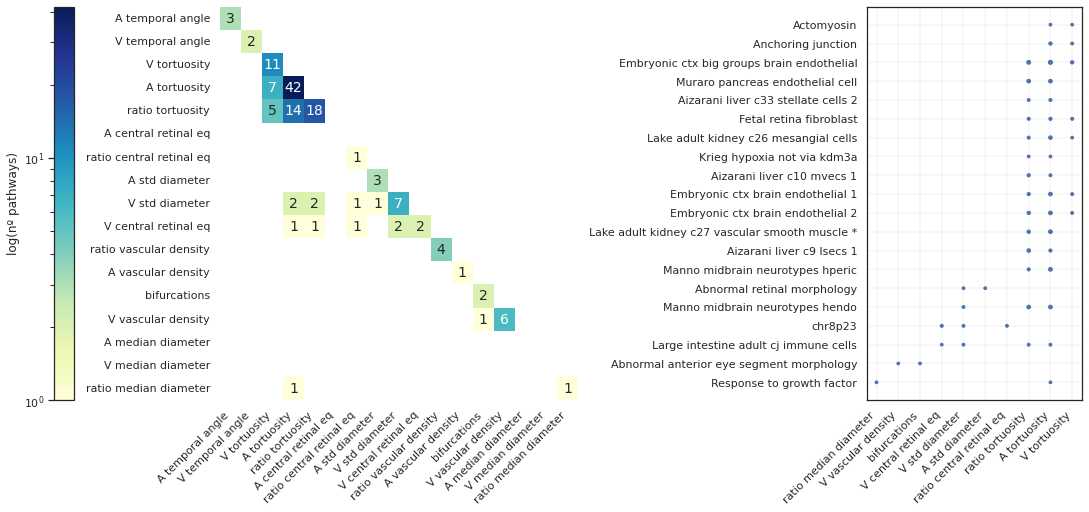

In [40]:

from matplotlib.colors import LogNorm

cbar_by_default = False

sns.set(style="white")
plt.rcParams['font.size'] = '14'
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['figure.constrained_layout.use'] = True
size_cbar_label = 12

figsize_val=(15, 7)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=figsize_val, gridspec_kw={'width_ratios': [1, 0.6]}) # sharey=True, 
#fig.tight_layout()

if cbar_by_default== True:
    fig1 = sns.heatmap(df_save_shapes, annot=df_save_shapes, fmt='',  cmap="YlGnBu",  norm=LogNorm(), cbar=False, mask=mask, ax=ax1) 
    fig1.set_xticklabels(ax1.get_xticklabels(), rotation = 45, ha='right')
    fig.colorbar(ax1.collections[0], ax=ax1, location="right", use_gridspec=None, pad=0.02).set_label(label='log(nº pathways)', size=size_cbar_label)
    #plt.ylabel('Logistic regresion')
    #plt.xlabel('Vascular IDPs')


else:
    fig1 = sns.heatmap(df_save_shapes, annot=df_save_shapes, fmt='',  cmap="YlGnBu",  norm=LogNorm(), cbar=False, mask=mask, ax=ax1) 
    fig1.set_xticklabels(ax1.get_xticklabels(), rotation = 45, ha='right')
    fig.colorbar(ax1.collections[0], ax=ax1, location="left", use_gridspec=None, pad=0.03).set_label(label='log(nº pathways)', size=size_cbar_label)
    #plt.ylabel(' ')
    #plt.xlabel('Vascular IDPs')

### change pathways names:
df_reduc['pathway'].replace(list(dic_rename_pathways.keys()), list(dic_rename_pathways.values()), inplace=True)

#fig2 = plt.scatter(df_reduc['file_col'], df_reduc['pathway'], s=1.25*df_reduc['-log10(p)'], ax=ax2)
fig2 = ax2.scatter(df_reduc['file_col'], df_reduc['pathway'], s=1.25*df_reduc['-log10(p)'])
plt.grid(color='gray', linestyle='-', linewidth=0.1)
#fig2.set_xticklabels(ax2.get_xticklabels(), rotation = 45, ha='right')
fig2 = plt.xticks(rotation=45, ha='right')
#plt.xlabel('Vascular IDPs')
